In [1]:
# initial parameters

%matplotlib inline
# load libraries
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.cluster import KMeans
import urllib.request
from pylab import rcParams
rcParams['figure.figsize'] = 9, 8  # set plot size
from sklearn.datasets import load_iris

#### GET THE DATA

In [2]:
# read training and test data from the url link and save the file to your working directory
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-training-true.data"

urllib.request.urlretrieve(url, "poker_train.csv")

url2 = "http://archive.ics.uci.edu/ml/machine-learning-databases/poker/poker-hand-testing.data"

urllib.request.urlretrieve(url2, "poker_test.csv")

# read the data in and add column names
data_train = pd.read_csv("poker_train.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])

data_test = pd.read_csv("poker_test.csv", header=None,
                        names=['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5', 'CLASS'])

#### EXPLORE THE DATA

In [3]:
# summary statistics including counts, mean, stdev, quartiles for the training dataset
data_train.head(n=5)

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
data_train.dtypes # data types of each variable

S1       int64
C1       int64
S2       int64
C2       int64
S3       int64
C3       int64
S4       int64
C4       int64
S5       int64
C5       int64
CLASS    int64
dtype: object

In [5]:
data_train.describe()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


#### SUBSET THE DATA

In [6]:
# subset clustering variables
cluster=data_train[['S1', 'C1', 'S2', 'C2', 'S3', 'C3','S4', 'C4', 'S5', 'C5']]

#### STANDARDIZE THE DATA

In [7]:
# standardize clustering variables to have mean=0 and sd=1 so that card suit and
# rank are on the same scale as to have the variables equally contribute to the analysis
clustervar=cluster.copy() # create a copy
clustervar['S1']=preprocessing.scale(clustervar['S1'].astype('float64'))
clustervar['C1']=preprocessing.scale(clustervar['C1'].astype('float64'))
clustervar['S2']=preprocessing.scale(clustervar['S2'].astype('float64'))
clustervar['C2']=preprocessing.scale(clustervar['C2'].astype('float64'))
clustervar['S3']=preprocessing.scale(clustervar['S3'].astype('float64'))
clustervar['C3']=preprocessing.scale(clustervar['C3'].astype('float64'))
clustervar['S4']=preprocessing.scale(clustervar['S4'].astype('float64'))
clustervar['C4']=preprocessing.scale(clustervar['C4'].astype('float64'))
clustervar['S5']=preprocessing.scale(clustervar['S5'].astype('float64'))
clustervar['C5']=preprocessing.scale(clustervar['C5'].astype('float64'))

# The data has been already split data into train and test sets
clus_train = clustervar

#### K-MEANS ANALYSIS - INITIAL CLUSTER SET

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

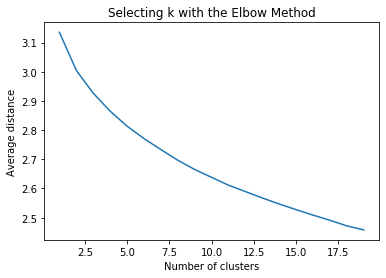

In [8]:
# k-means cluster analysis for 1-10 clusters due to the 10 possible class outcomes for poker hands                                                       
from scipy.spatial.distance import cdist
clusters=range(1,20)
meandist=[]

# loop through each cluster and fit the model to the train set
# generate the predicted cluster assingment and append the mean distance my taking the sum divided by the shape
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    clusassign=model.predict(clus_train)
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1))
    / clus_train.shape[0])

"""
Plot average distance from observations from the cluster centroid
to use the Elbow Method to identify number of clusters to choose
"""
plt.plot(clusters, meandist)
plt.xlabel('Number of clusters')
plt.ylabel('Average distance')
plt.title('Selecting k with the Elbow Method') # pick the fewest number of clusters that reduces the average distance

#### Interpret 2 cluster solution

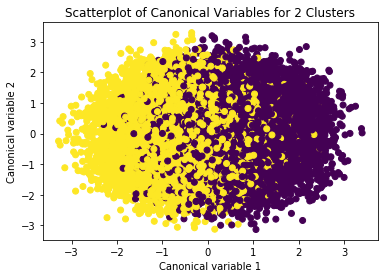

In [9]:
model3=KMeans(n_clusters=2)
model3.fit(clus_train) # has cluster assingments based on using 2 clusters
clusassign=model3.predict(clus_train)
# plot clusters
''' Canonical Discriminant Analysis for variable reduction:
1. creates a smaller number of variables
2. linear combination of clustering variables
3. Canonical variables are ordered by proportion of variance accounted for
4. most of the variance will be accounted for in the first few canonical variables
'''
from sklearn.decomposition import PCA # CA from PCA function
pca_2 = PCA(2) # return 2 first canonical variables
plot_columns = pca_2.fit_transform(clus_train) # fit CA to the train dataset
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,) # plot 1st canonical variable on x axis, 2nd on y-axis
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.title('Scatterplot of Canonical Variables for 2 Clusters')
plt.show() # close or overlapping clusters idicate correlated variables with low in-class variance but not good separation. 2 cluster might be better.

In [10]:
# Let's try few variations of Hierarchical clustering for IRIS Dataset
iris = load_iris()
iris = iris.data[:, :4]
print(iris[:4])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]


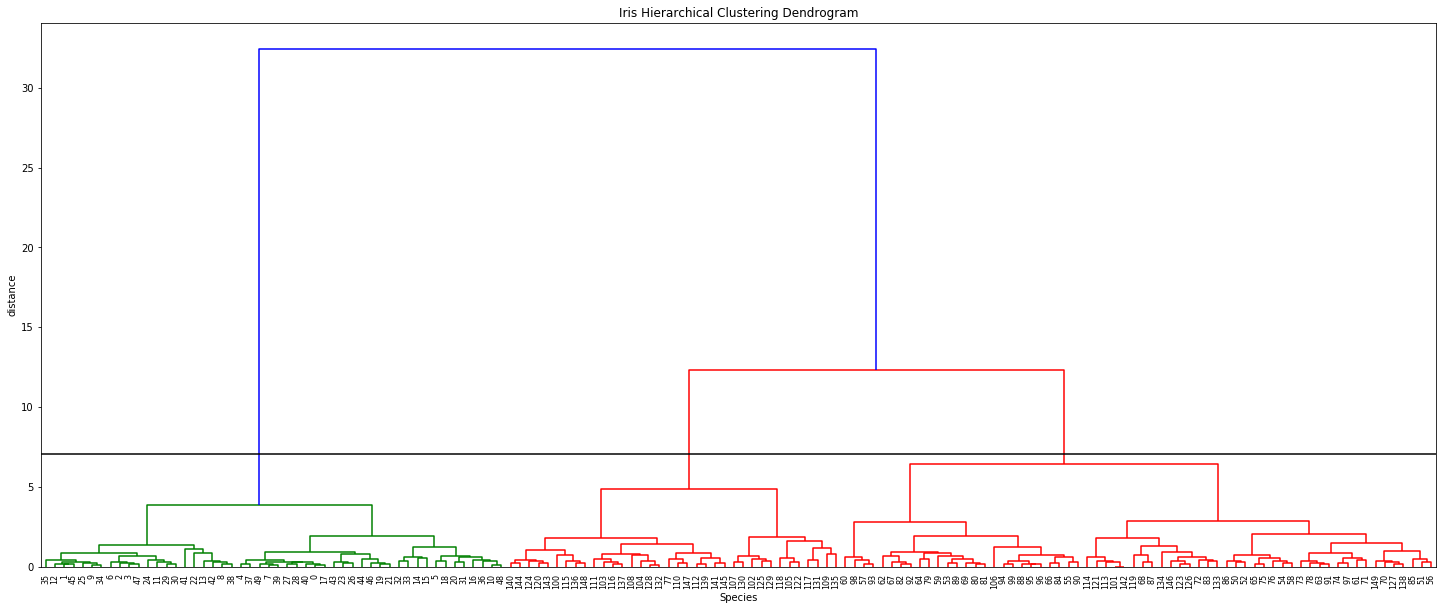

In [11]:
# calculate full dendrogram
from scipy.cluster.hierarchy import dendrogram, linkage

# generate the linkage matrix
Z = linkage(iris, 'ward')

# set cut-off to 50
max_d = 7.08                # max_d as in max_distance

plt.figure(figsize=(25, 10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=150,                  # Try changing values of p
    leaf_rotation=90.,      # rotates the x axis labels
    leaf_font_size=8.,      # font size for the x axis labels
)
plt.axhline(y=max_d, c='k')
plt.show()

Max Hierarchy distances:  7.085195833567341
ind:  2.1255587500702022


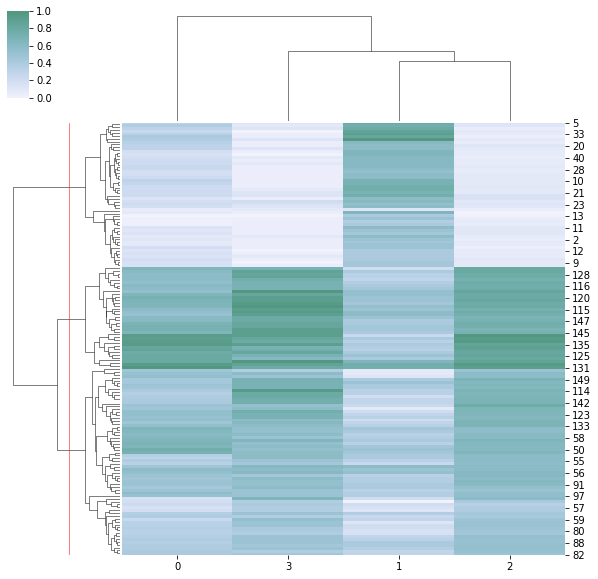

In [14]:
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['pdf.fonttype'] = 42
from scipy.spatial import distance
from scipy.cluster import hierarchy
from sklearn import datasets

method = 'weighted' # 'single', 'complete', 'weighted', and 'average'
cuttoff = 0.3 # cuttoff for clusters 0 = individual samples, 1 = all samples
# grouped - shown as red line

cmap = sns.cubehelix_palette(as_cmap=True, start=-1.5, rot=0.5, light=0.95, dark=0.5)

d = hierarchy.distance.pdist(iris)
print('Max Hierarchy distances: ',d.max())
print('ind: ',cuttoff*d.max())
L = hierarchy.linkage(d, method=method, metric='euclidean')
ind = hierarchy.fcluster(L, cuttoff*d.max(), 'distance')

col_L = hierarchy.linkage(distance.pdist(iris.T), method=method)

g = sns.clustermap(iris, row_linkage=L,
            col_linkage=col_L, method=method,
               standard_scale=1, linewidths=.0, figsize=(10, 10),
               cmap=cmap)

ax = g.ax_row_dendrogram
ax.plot([cuttoff*d.max(), cuttoff*d.max()], [0, len(d)], 'r', lw = 0.5)
np.savetxt(r'C:/Users/chand/row_cluster.csv',ind, delimiter=",")

plt.show()